In [1]:
import pandas as pd 
import numpy as np
from tqdm import tqdm
from matplotlib import pyplot as plt 
import seaborn as sns
sns.set()

from stop_permuting_features.src.utils import get_lr

In [2]:
data_path = "../data/experiment_results.csv"
data = pd.read_csv(data_path)

In [3]:
data.shape

(55, 14)

In [4]:
data.head()

,corr_data_correlation_min,corr_data_correlation_max,corr_data_correlation_median,corr_data_correlation_mean,corr_data_correlation_std,corr_data_abs_correlation_min,corr_data_abs_correlation_max,corr_data_abs_correlation_median,corr_data_abs_correlation_mean,corr_data_abs_correlation_std,model_roc_auc,permutation_ranks_corr,shap_ranks_corr,gain_ranks_corr
0,0.877931,0.950582,0.925674,0.925233,0.016345,0.877931,0.950582,0.925674,0.925233,0.016345,0.873828,0.747035,0.716773,0.716673
1,0.716702,0.950444,0.864028,0.863978,0.054989,0.716702,0.950444,0.864028,0.863978,0.054989,0.889327,0.668571,0.697574,0.712129
2,0.548597,0.950246,0.781369,0.786241,0.097979,0.548597,0.950246,0.781369,0.786241,0.097979,0.904901,0.596351,0.577966,0.582360
3,0.413126,0.949987,0.695002,0.707632,0.134504,0.413126,0.949987,0.695002,0.707632,0.134504,0.916868,0.695558,0.635553,0.647497
4,0.313848,0.949782,0.613094,0.635495,0.161738,0.313848,0.949782,0.613094,0.635495,0.161738,0.921980,0.616134,0.622777,0.619433


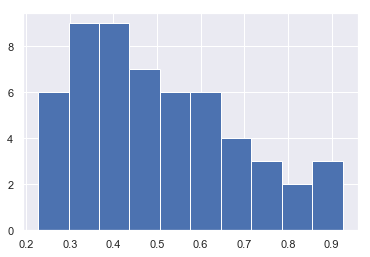

In [5]:
data["corr_data_abs_correlation_mean"].hist()

R2 score permutation_ranks_corr: 0.3406
R2 score shap_ranks_corr: 0.5220
R2 score gain_ranks_corr: 0.5397


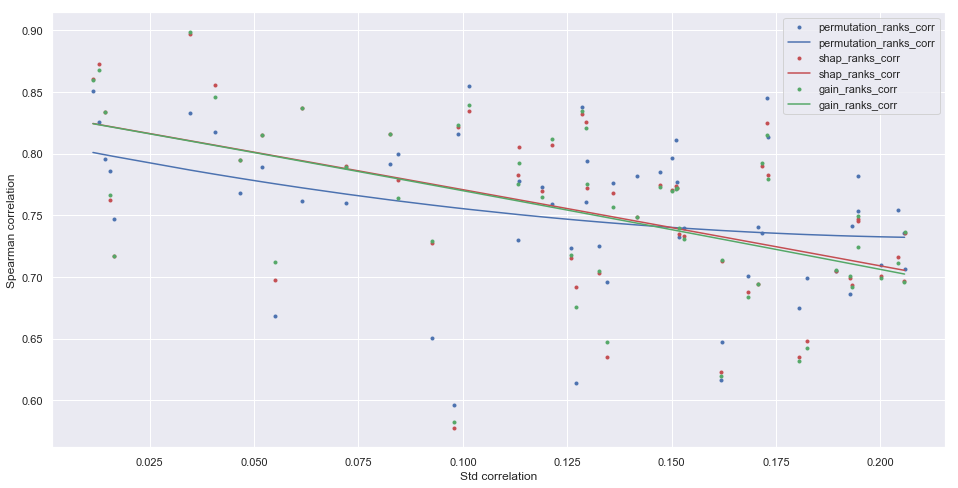

In [6]:
x_label = "corr_data_abs_correlation_std"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(16, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}")
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree, y_label), f"-{y_color}", label=y_label_legend)

plt.xlabel("Std correlation")
plt.ylabel("Spearman correlation")
plt.legend()
plt.show()

R2 score permutation_ranks_corr: 0.3187
R2 score shap_ranks_corr: 0.1656
R2 score gain_ranks_corr: 0.1621


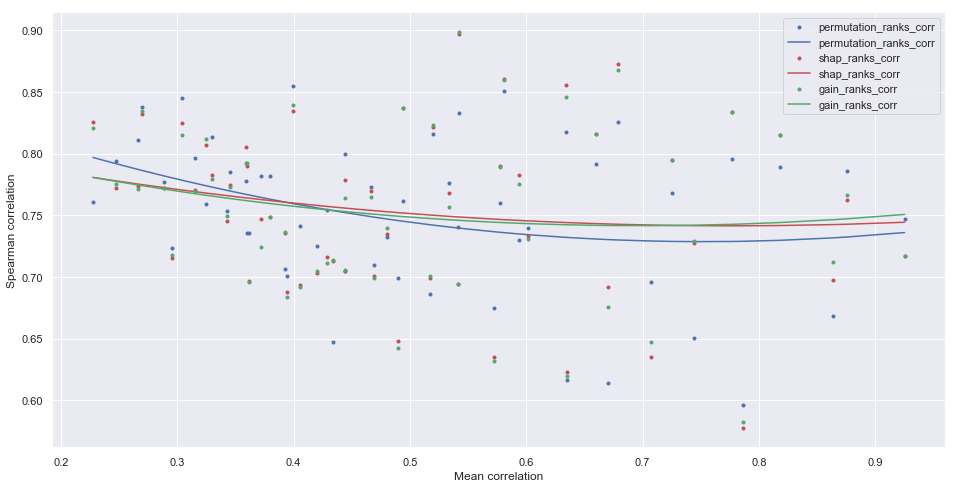

In [7]:
x_label = "corr_data_abs_correlation_mean"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(16, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}")
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree, y_label), f"-{y_color}", label=y_label_legend)

plt.xlabel("Mean correlation")
plt.ylabel("Spearman correlation")
plt.legend()
plt.show()

R2 score : 0.6484
R2 score : 0.7259
R2 score : 0.7207


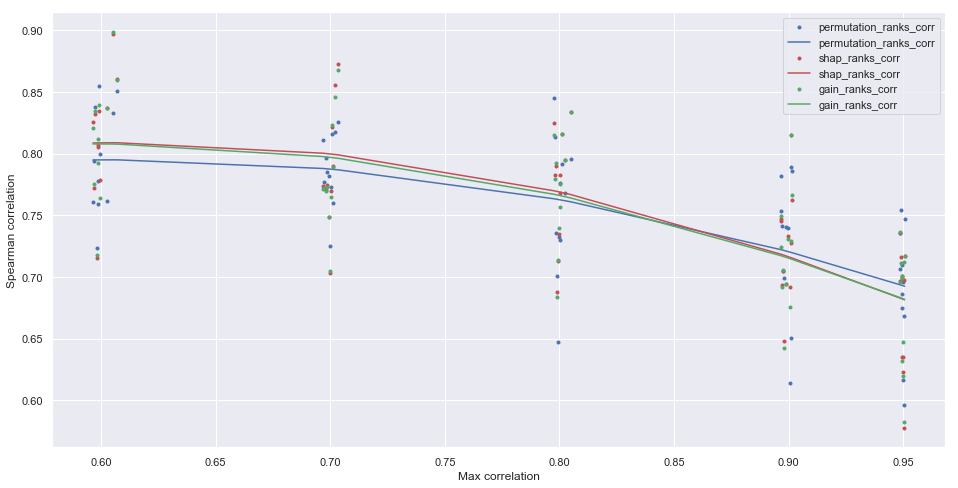

In [8]:
x_label = "corr_data_abs_correlation_max"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(16, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}")
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree), f"-{y_color}", label=y_label_legend)

plt.xlabel("Max correlation")
plt.ylabel("Spearman correlation")
plt.legend()
plt.show()

R2 score : 0.1889
R2 score : 0.4299
R2 score : 0.4447


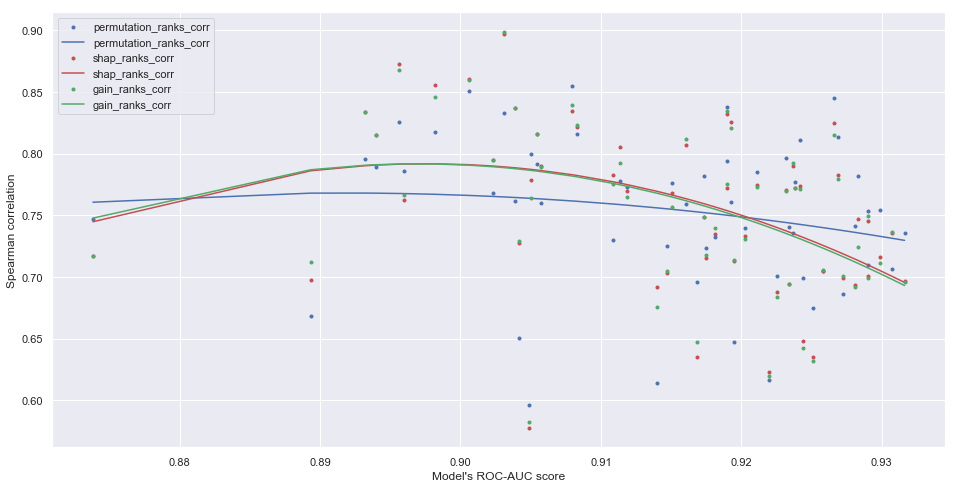

In [9]:
x_label = "model_roc_auc"
y_labels = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr", "shap_ranks_corr", "gain_ranks_corr"]
degrees = [2, 2, 2]
y_colors = ["b", "r", "g"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(16, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}")
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree), f"-{y_color}", label=y_label_legend)

plt.xlabel("Model's ROC-AUC score")
plt.ylabel("Spearman correlation")
plt.legend()
plt.show()

R2 score : 0.1889


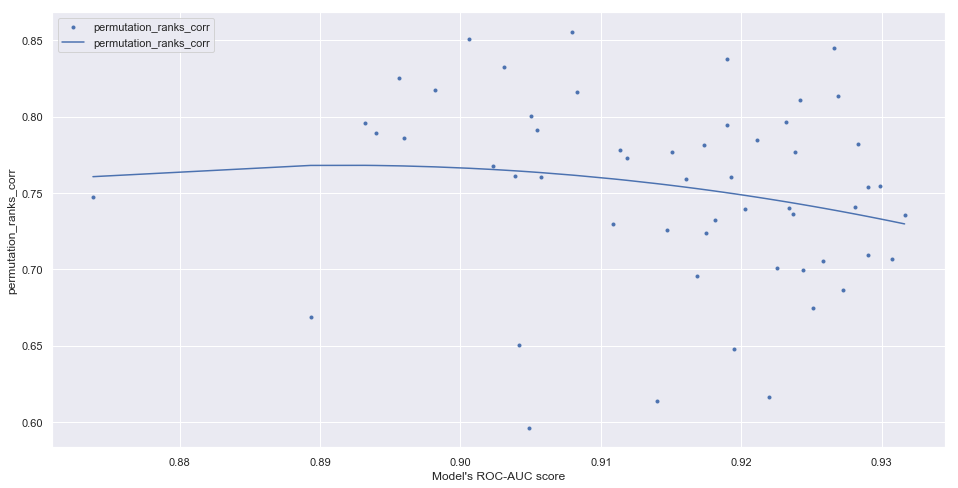

In [10]:
x_label = "model_roc_auc"
y_labels = ["permutation_ranks_corr"]
y_labels_legend = ["permutation_ranks_corr"]
degrees = [2]
y_colors = ["b"]

data = data.sort_values(by=x_label).reset_index(drop=True)

plt.figure(figsize=(16, 8))
for y_label, y_label_legend, degree, y_color in zip(y_labels, y_labels_legend, degrees, y_colors):
    plt.plot(data[x_label], data[y_label], f".{y_color}")
    plt.plot(data[x_label], get_lr(data[x_label], data[y_label], degree), f"-{y_color}", label=y_label_legend)

plt.xlabel("Model's ROC-AUC score")
plt.ylabel("permutation_ranks_corr")
plt.legend()
plt.show()